##  Customer Analysis  using Random Forest  

In [21]:
# General Dependencies
import os
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz


In [2]:
# Read the data

try:
    df_rfm17 = pd.read_csv('data/rfm17.csv')
    df_rfm18 = pd.read_csv('data/rfm18.csv')
except:
    print (" Cannot find datasets rfm17.csv and rfm18.csv")
    exit()   

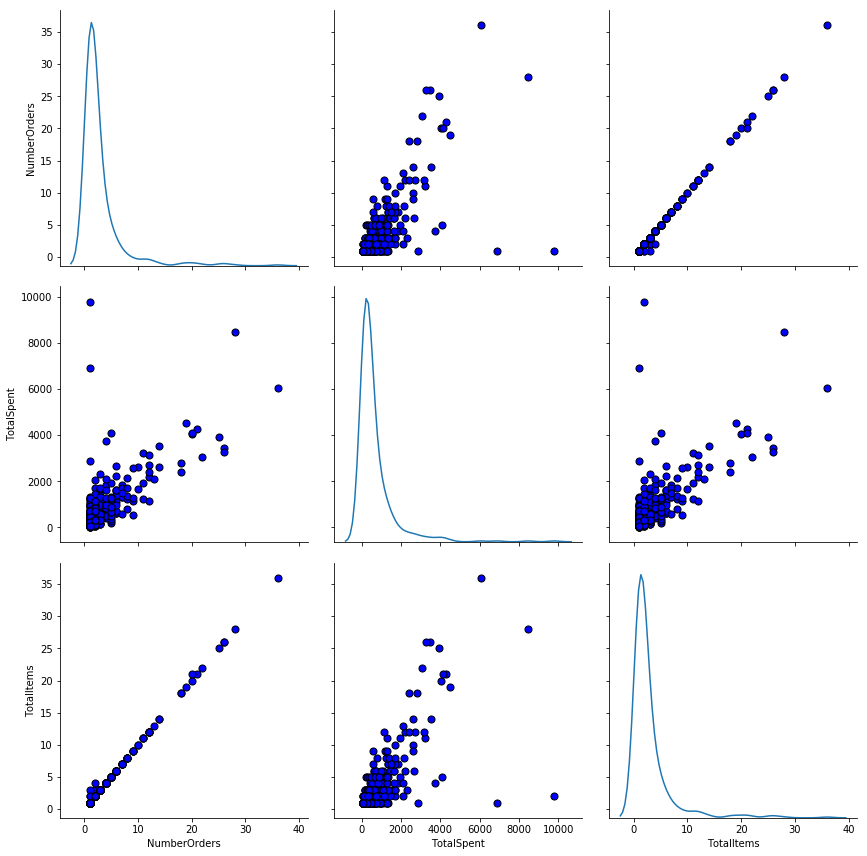

In [3]:
g = sns.pairplot(df_rfm17 , size=4, vars=["NumberOrders", "TotalSpent", 'TotalItems'], 
                 diag_kind="kde", plot_kws=dict(s=50, edgecolor="black", color='blue', linewidth=1) )
plt.savefig('Images/cust_rfm17.png')

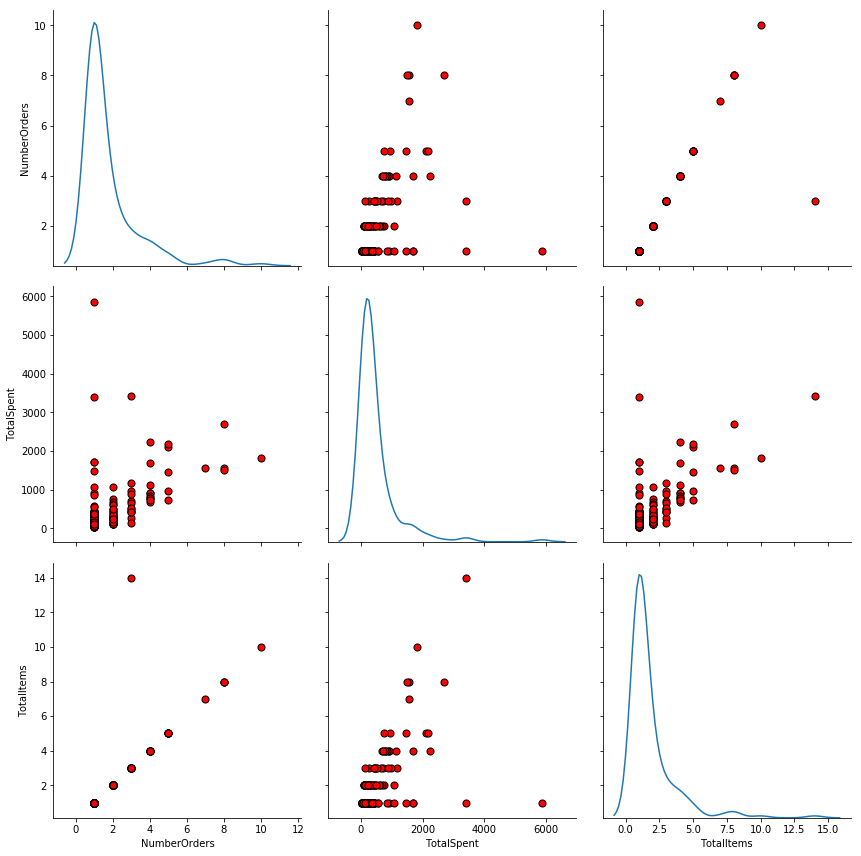

In [4]:
g = sns.pairplot(df_rfm18 , size=4, vars=["NumberOrders", "TotalSpent", 'TotalItems'], 
                 diag_kind="kde", plot_kws=dict(s=50, edgecolor="black", color='red', linewidth=1) )
plt.savefig('Images/cust_rfm18.png')

## Applying Machine Learning 'Radomforest"

In [5]:
def RandomForest(df):
    
    # Big Spender is what we are going to try to predict

    RF = df.drop(['LoyalCustomer','ManyOrders', 'RFMScore'],axis=1)
    RF['BigSpender'] = RF.BigSpender.astype(str)

    target = RF['BigSpender']

    target_names = ['1','2','3','4']

    data = RF.drop(["CustomerID", 'BigSpender'], axis=1)
    feature_names = data.columns

    print(data.head())
    print('')
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

    print('Number of observations in the training data:', len(X_train))
    print('Number of observations in the test data:',len(X_test))
    
    # Create a Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=200)
    rf = rf.fit(X_train, y_train)
    rf.score(X_test, y_test)
    print('')
    
    print (' Features sorted: ', sorted(zip(rf.feature_importances_, feature_names), reverse=True))

In [32]:
def DecisionTreeReg(df):
    
    regressor = DecisionTreeRegressor(max_depth=2)
    regressor.fit(np.array([df['TotalItems']]).T, df['TotalSpent'])

    xx = np.array([np.linspace(1, 36, 100)]).T
    
    plt.figure(figsize=(8,6))
    plt.plot(df['TotalItems'], df['TotalSpent'], 'o', label='observation')
    plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
    plt.xlabel('Total Items')
    plt.ylabel('Total Spend')
    plt.legend(loc='best')
    plt.savefig('Images/cust_dectreereg.png')
    plt.show()
    
    display(export_graphviz(regressor, out_file='Images/cust_dectree.dot', feature_names=['Total Items']))
 
    #return(graph)


In [7]:
RandomForest(df_rfm17)

   NumberOrders  TotalSpent  TotalItems  DaysAsCustomer  DaysNoPurchase
0             7      1832.0         7.0           276.0            92.0
1             5       200.0         5.0           184.0           184.0
2            21      4272.0        21.0           335.0           154.0
3             4       932.0         4.0           215.0            62.0
4             1       184.0         1.0           123.0           123.0

Number of observations in the training data: 369
Number of observations in the test data: 124

 Features sorted:  [(0.7974179632767001, 'TotalSpent'), (0.06689884260302441, 'NumberOrders'), (0.06594936337106266, 'TotalItems'), (0.04174002655641987, 'DaysNoPurchase'), (0.02799380419279385, 'DaysAsCustomer')]


In [8]:
RandomForest(df_rfm18)

   NumberOrders  TotalSpent  TotalItems  DaysAsCustomer  DaysNoPurchase
0             4       903.0         4.0            29.0             1.0
1             2       749.0         2.0            29.0             1.0
2             7      1552.0         7.0            60.0             1.0
3             1       398.0         1.0            29.0            29.0
4             3      3414.0        14.0            29.0             1.0

Number of observations in the training data: 135
Number of observations in the test data: 46

 Features sorted:  [(0.8153335578852999, 'TotalSpent'), (0.06786053596533721, 'TotalItems'), (0.06349339262852098, 'NumberOrders'), (0.029809617614209905, 'DaysNoPurchase'), (0.023502895906632047, 'DaysAsCustomer')]


In [12]:
df_rfm17.describe()

,NumberOrders,TotalSpent,TotalItems,DaysAsCustomer,DaysNoPurchase,LoyalCustomer,ManyOrders,BigSpender,RFMScore
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,2.894523,643.115619,2.910751,221.772819,173.306288,1.914807,2.004057,2.494929,214.016227
std,4.015852,997.711351,4.022314,84.998285,88.884468,1.076752,1.182522,1.121879,116.558857
min,1.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000
25%,1.000000,142.000000,1.000000,184.000000,123.000000,1.000000,1.000000,1.000000,112.000000
50%,2.000000,326.000000,2.000000,215.000000,184.000000,2.000000,2.000000,2.000000,211.000000
75%,3.000000,703.000000,3.000000,276.000000,215.000000,3.000000,3.000000,3.000000,322.000000
max,36.000000,9800.000000,36.000000,335.000000,335.000000,4.000000,4.000000,4.000000,444.000000


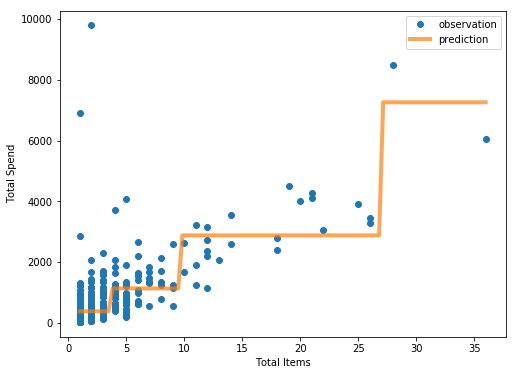

None

In [36]:
DecisionTreeReg(df_rfm17)

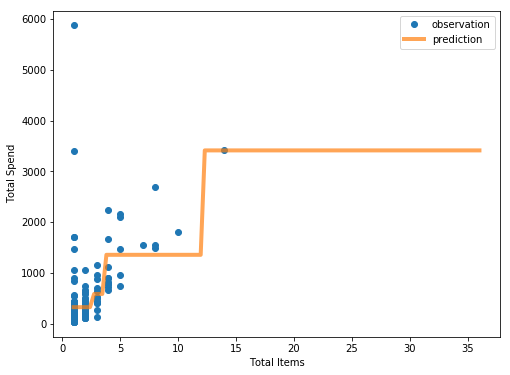

None

In [34]:
DecisionTreeReg(df_rfm18)
